In [1]:
from INCMD import INCMD

import numpy as np
import matplotlib.pyplot as plt

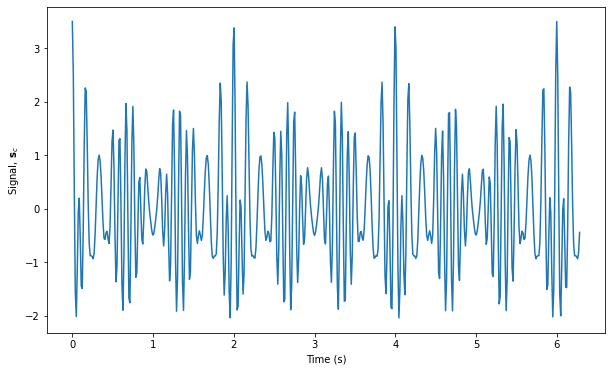

In [2]:
# Fabricate a test signal
t = np.linspace(0,2*np.pi, 512)

# Mode 1
amp_1 = 1 + np.cos(3*np.pi*t)
omega_1 = 12
mode_1 = lambda t: amp_1 * np.cos(2*np.pi*omega_1*t)

# Mode 2
amp_2 = 0.5 + np.cos(np.pi*t)
omega_2 = 6
mode_2 = lambda t: amp_2 * np.cos(2*np.pi*omega_2*t)

#Construct the signal
signal = mode_1(t) + mode_2(t)

#Plot the signal
plt.figure(figsize=(10,6))
plt.plot(t, signal)
plt.ylabel(r"Signal, $\mathbf{s}_c$")
plt.xlabel("Time (s)")
plt.show()

In [3]:
# Compute the instantaneous frequencies!
IF_1 = np.gradient(omega_1*t, t)
IF_2 = np.gradient(omega_2*t, t)

In [8]:
%%time
incmd = INCMD(signal, t, iters=7000, rho=1e-3, mu=1e-4, tol=1e-6)
f_bars, gs, g_d1s, g_d2s = incmd.decompose(modes=2)

Wall time: 186 ms


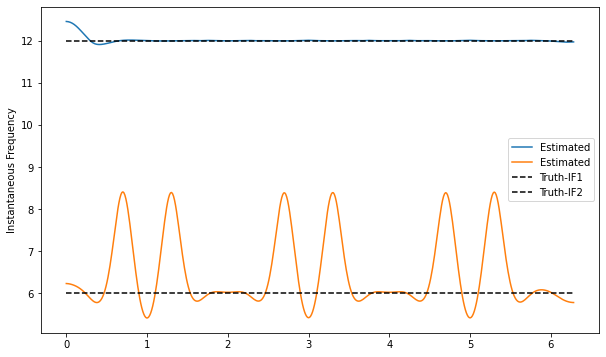

In [9]:
plt.figure(figsize=(10,6))

for f_bar in f_bars:
    plt.plot(t, f_bar, label='Estimated')
    
plt.plot(t, IF_1, '--k', label='Truth-IF1')
plt.plot(t, IF_2, '--k', label='Truth-IF2')

plt.ylabel("Instantaneous Frequency")

plt.legend()
plt.show()

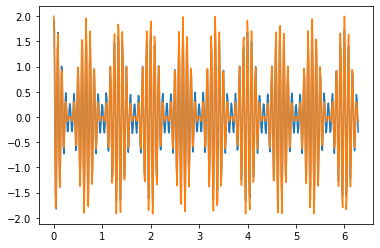

In [10]:
# Can look at the individual modes like so:
plt.figure()
plt.plot(t, gs[0])
plt.plot(t, mode_1(t))
#plt.plot(t, gs[1])
#plt.plot(t, mode_2(t))
plt.show()

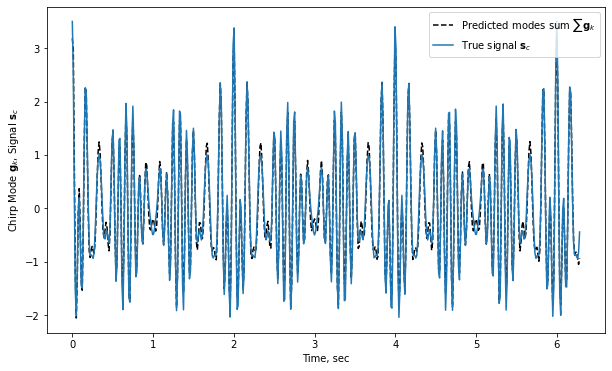

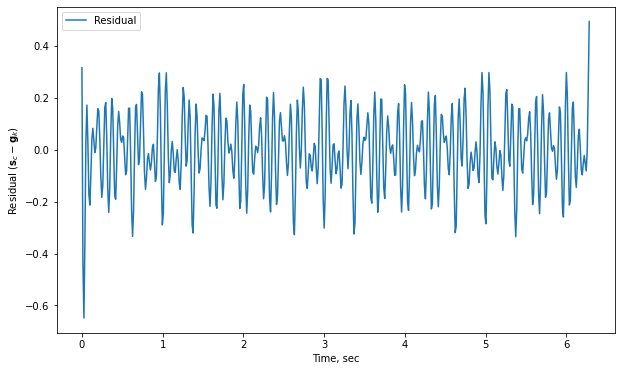

In [18]:
# Compare the combination of discovered modes (g_0 and g_1) vs the original signal
plt.figure(figsize=(10,6))
plt.plot(t, np.sum(gs, axis=0), '--k', label=r'Predicted modes sum $\sum \mathbf{g}_k$')
plt.plot(t, signal, label=r'True signal $\mathbf{s}_c$')
plt.ylabel(r"Chirp Mode $\mathbf{g}_k$, Signal $\mathbf{s}_c$")
plt.xlabel('Time, sec')
plt.legend()

plt.figure(figsize=(10,6))
plt.plot(t, signal-np.sum(gs,axis=0), label='Residual')
plt.ylabel(r'Residual ($\mathbf{s}_c-\mathbf{g}_k$)')
plt.xlabel('Time, sec')
plt.legend()
plt.show()